# SEP Spectra Tool
This tool determines an energy spectrum. 
You can choose between a peak spectrum or a time-integrated spectrum.

An optional pre-event background subtraction is possible.

At the end, you can determine integrated spectra for time slices of a given duration over a chosen time inte4r

In [3]:
import os
import datetime as dt
import pandas as pd
import numpy as np
from spectra import Event
import spectra.widgets as w
from seppy.util import jupyterhub_data_path
from IPython.display import Image, display

# Select spacecraft, instrument and time intervals

In [4]:
display(w.spacecraft_drop, w.sensor_drop, w.view_drop, w.species_drop)

Dropdown(description='Spacecraft:', index=2, options=('PSP', 'SOHO', 'Solar Orbiter', 'STEREO-A', 'STEREO-B', …

Dropdown(description='Sensor:', options=('EPT', 'HET'), value='EPT')

Dropdown(description='Viewing:', options=('sun', 'asun', 'north', 'south'), value='sun')

Dropdown(description='Species:', options=('ions', 'electrons'), value='ions')

# Data loading and background subtraction 

In [5]:
# Define period for data loading; the format is (year, month, day, hour, minute, second), with hour, minute, and second optional
startdate = dt.datetime(2021, 10, 28,9)
enddate = dt.datetime(2021, 10, 29, 20)

# choose if background subtraction is used and define background interval, if True
subtract_background = True
background_start = dt.datetime(2021, 10, 28, 12)
background_end = dt.datetime(2021, 10, 28, 15)   

# Choose the spectral type (peak spectrum or integral spectrum) and provide time interval

In [6]:
spectral_type = 'integral'  # 'integral' or 'peak'

# interval for spectral integration or peak search:
spec_start = dt.datetime(2021, 10, 28, 15)
spec_end = dt.datetime(2021, 10, 29, 9)

# Choose the resampling (this is used for the time series plots and will affect the spectrum if spectral_type == 'peak'
resample = '5min'  # '60s'

In [7]:
# Set your local path where you want to save the data files. If run on the project's JupyterHub server, set it to a common data folder. 
data_path = f"{os.getcwd()}{os.sep}data"
data_path = jupyterhub_data_path(data_path)

### Load the data


In [8]:
E = Event()
E.load_data(w.spacecraft_drop.value, w.sensor_drop.value, w.species_drop.value, startdate, enddate, w.view_drop.value, resample, data_path)

### Plot intensity-time series to tune the chosen time intervals

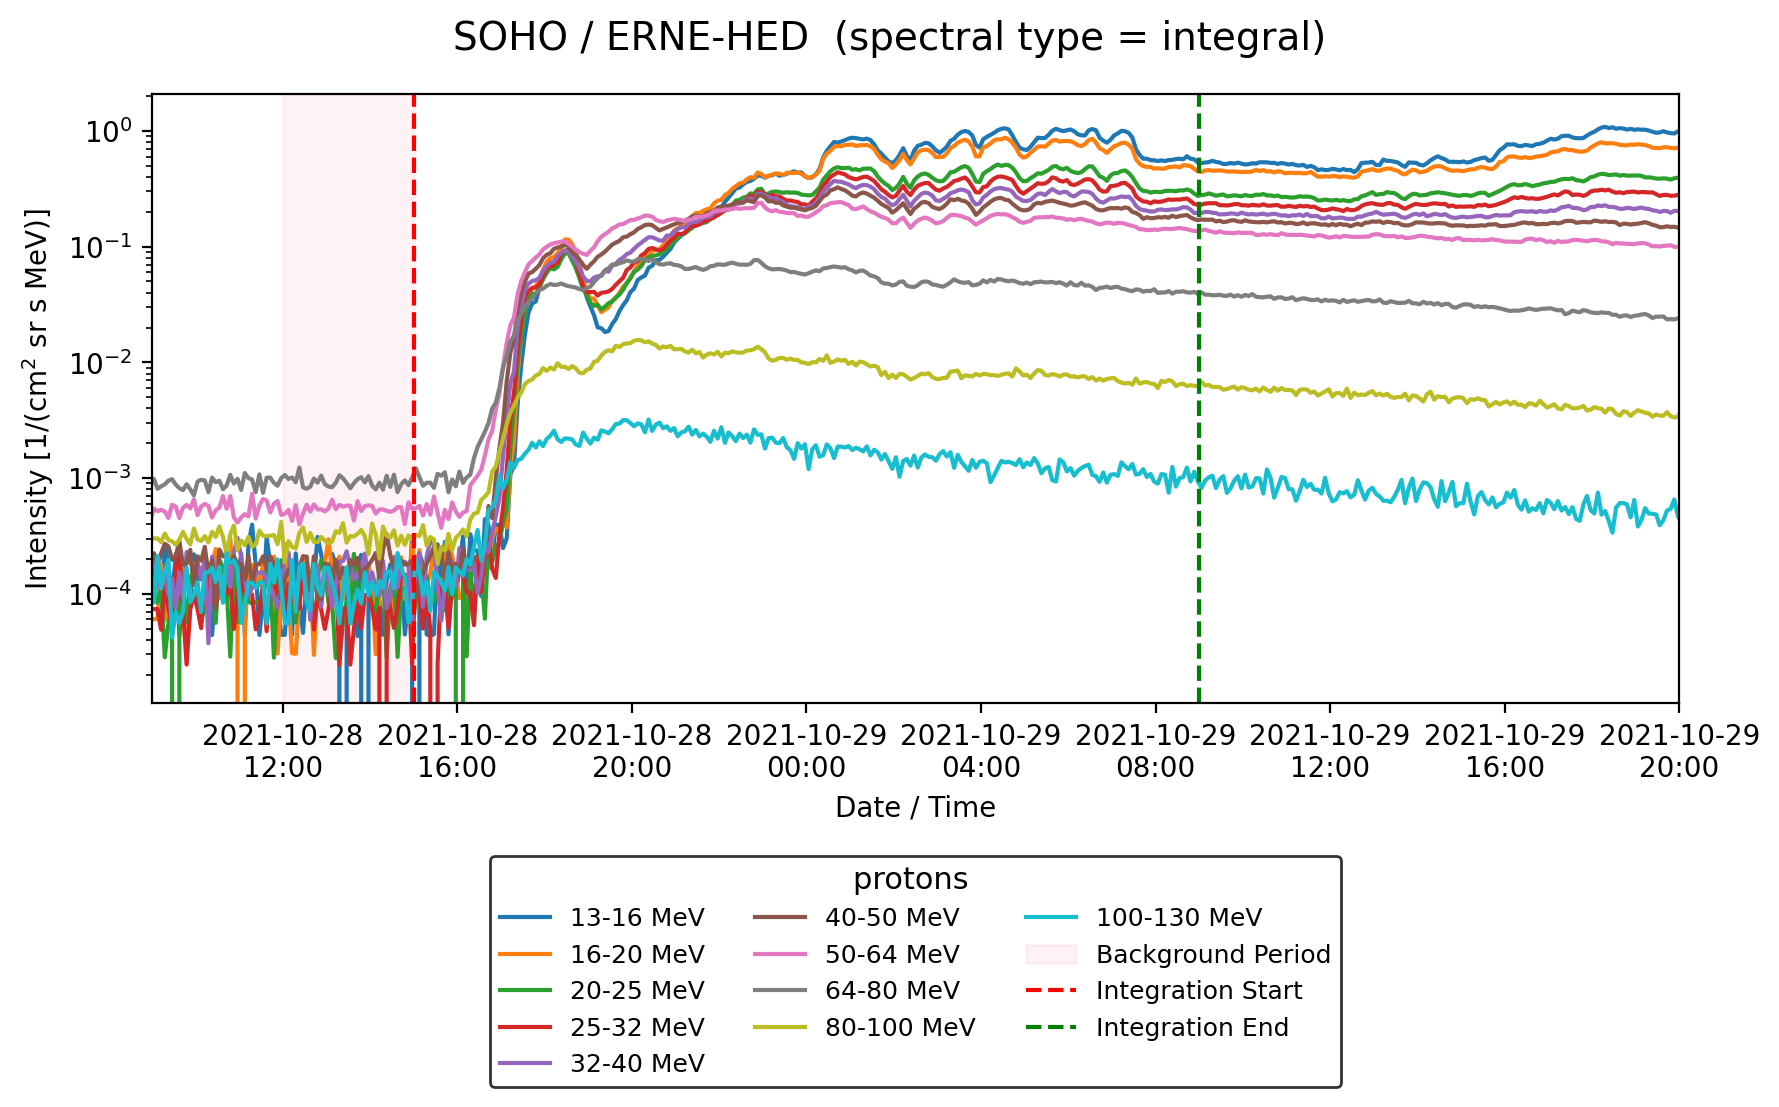

In [9]:
fig_ts, ax_ts = E.plot_flux(spec_start, spec_end, subtract_background=subtract_background, background_start=background_start, background_end=background_end, savefig=False, spec_type=spectral_type)

### Determine and plot spectrum

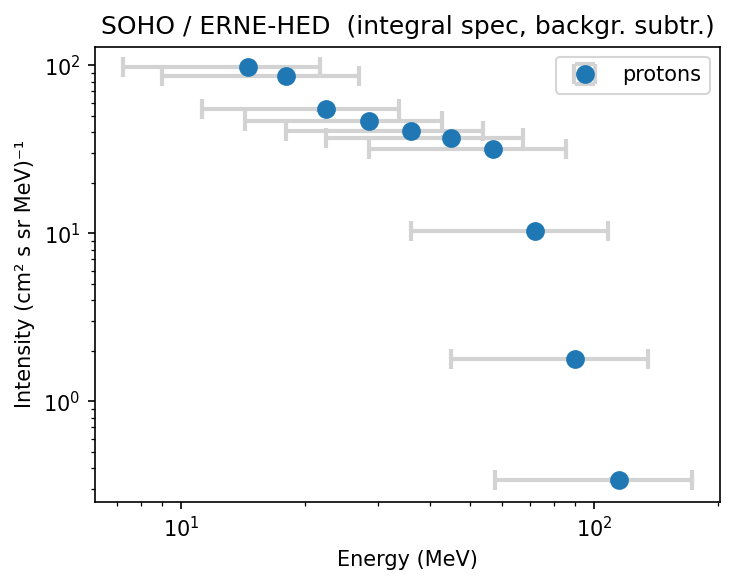

In [10]:
E.get_spec(spec_start, spec_end, spec_type=spectral_type, subtract_background=subtract_background, background_start=background_start, background_end=background_end)

fig, ax = E.plot_spectrum(savefig=False)

# Export spectrum data file

In [11]:
foldername = f'output_spectra{os.sep}'
filename = f'{foldername}spectrum_{spectral_type}_{E.spacecraft.upper()}_{E.instrument.upper()}_{E.viewing}_{E.species}.csv'

######## move these to spec file:
E.E_unc = E.spec_E.copy()/2.
E.I_unc = E.final_unc
######## 
spec_df = pd.DataFrame(dict(Energy = E.spec_E, Intensity = E.final_spec, E_err = E.E_unc, I_err = E.I_unc))
spec_df.to_csv(filename, index=False)

# Temporal evolution of the spectra

## Determine time interval and duration for spectra slices:

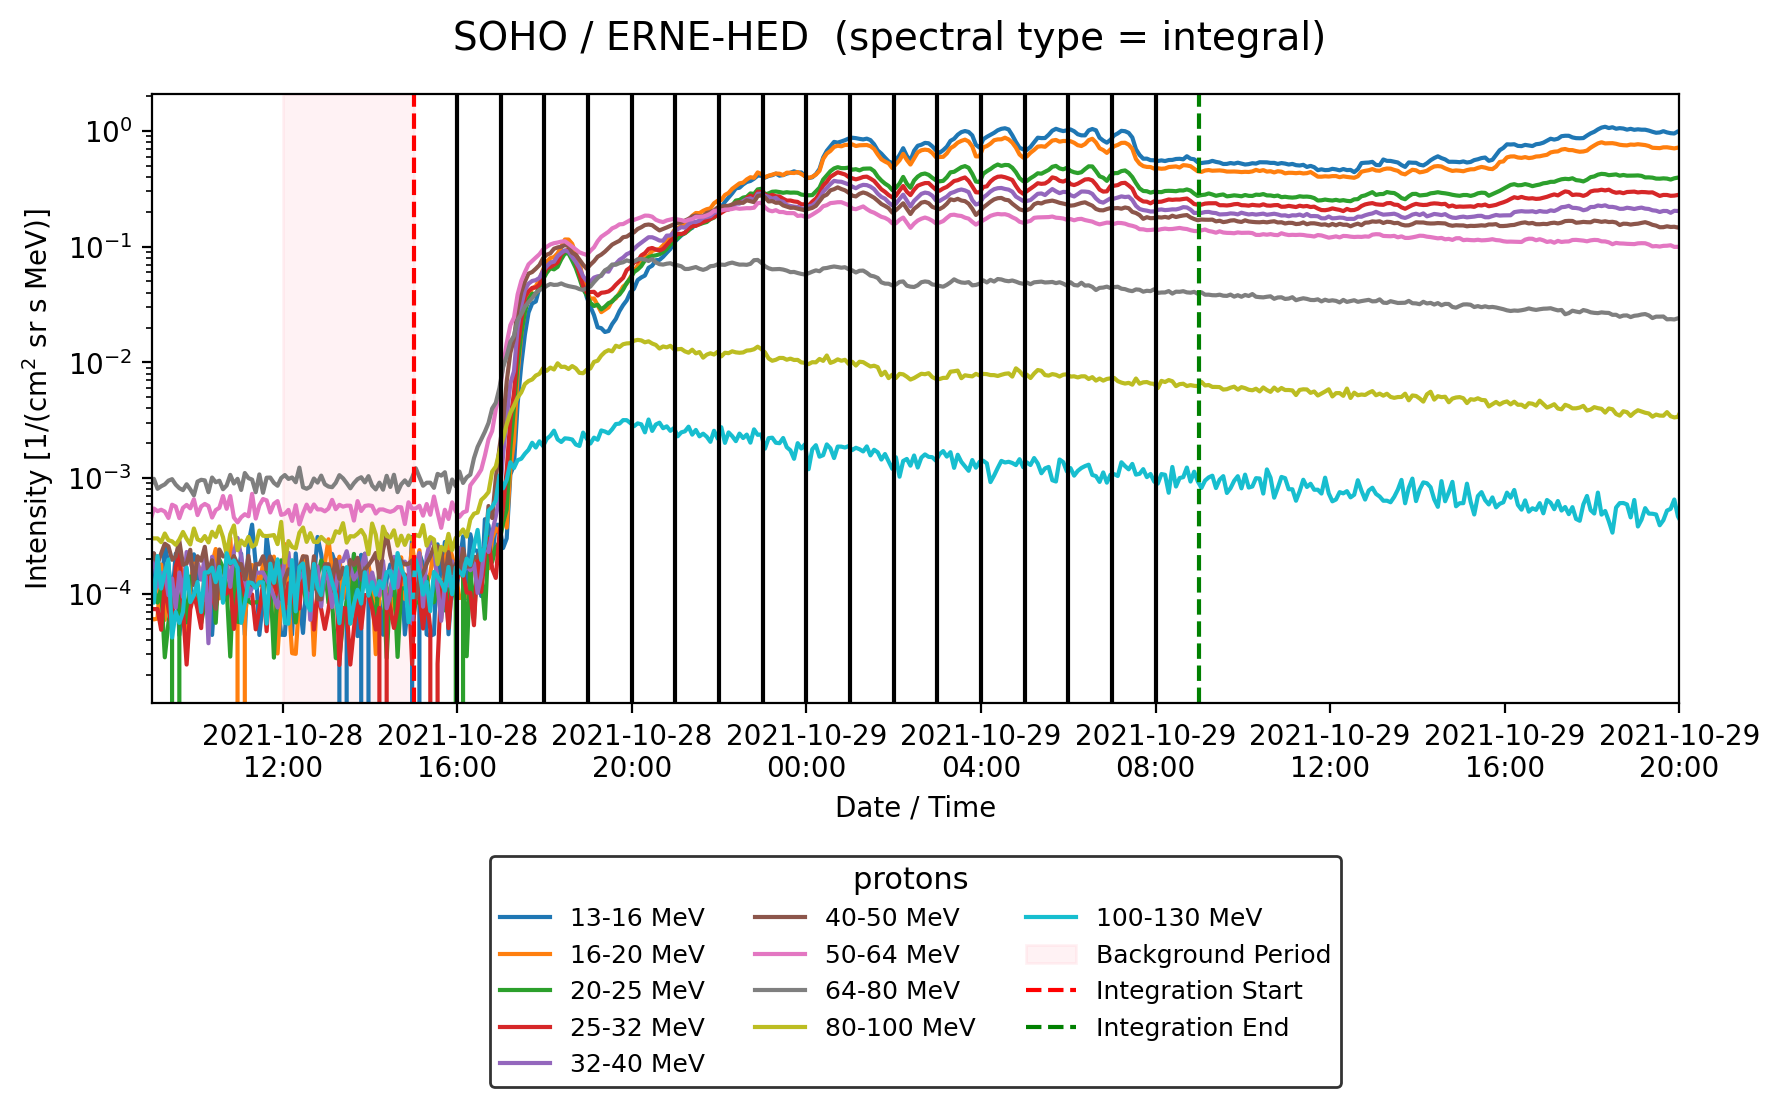

In [12]:
interval_start = spec_start
interval_end = spec_end
duration = pd.Timedelta(hours=1)
num_steps = int((interval_end-interval_start) / duration)

for i in np.arange(1, num_steps, 1): 
    time = interval_start + i * duration
    ax_ts.axvline(time, color='k')
    
fig_ts

# Determine spectra for each time slice and save output

Global y-range: 0.00 to 11.26


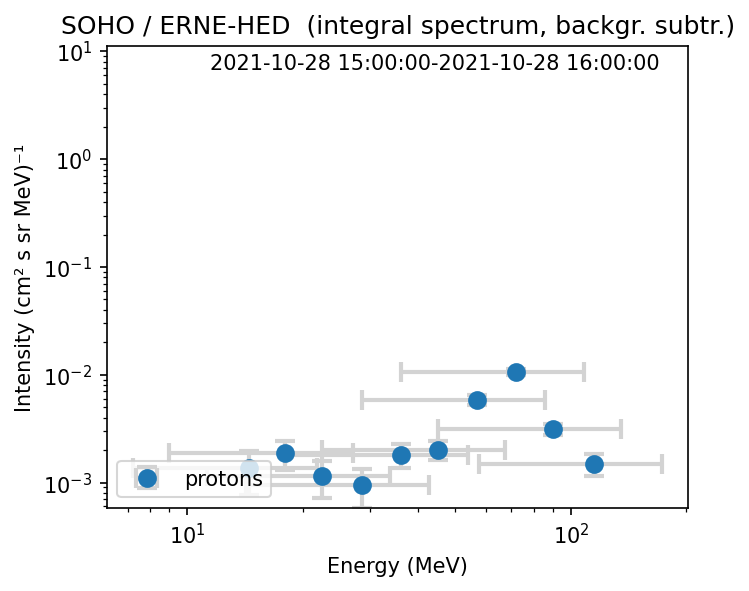

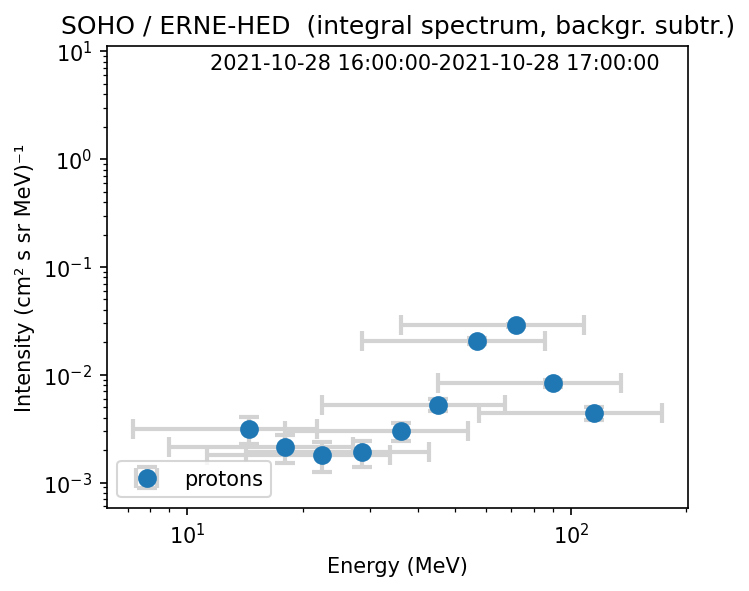

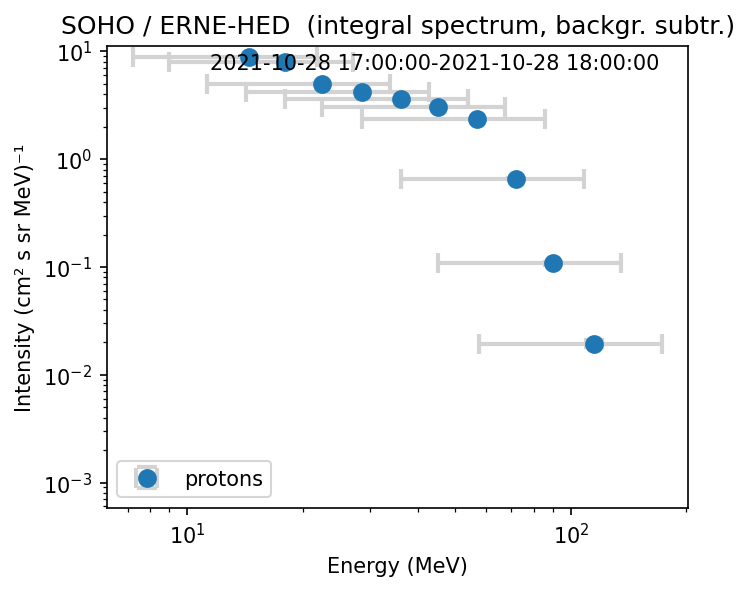

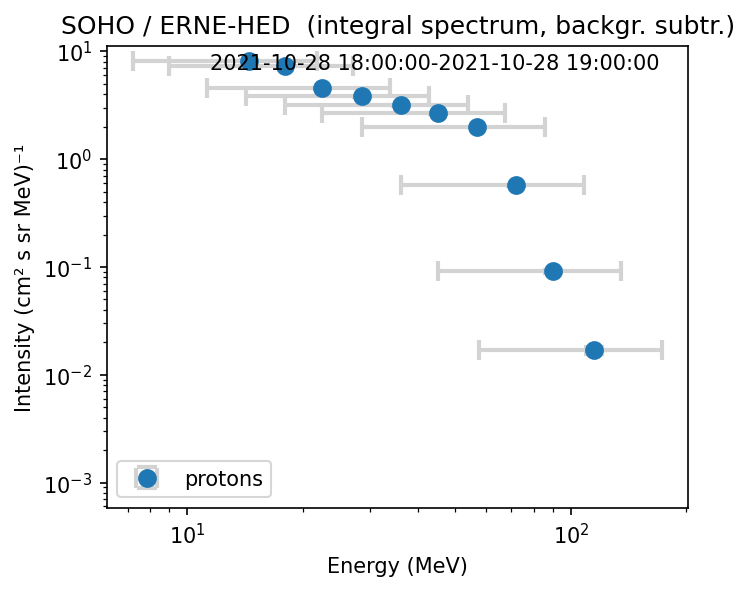

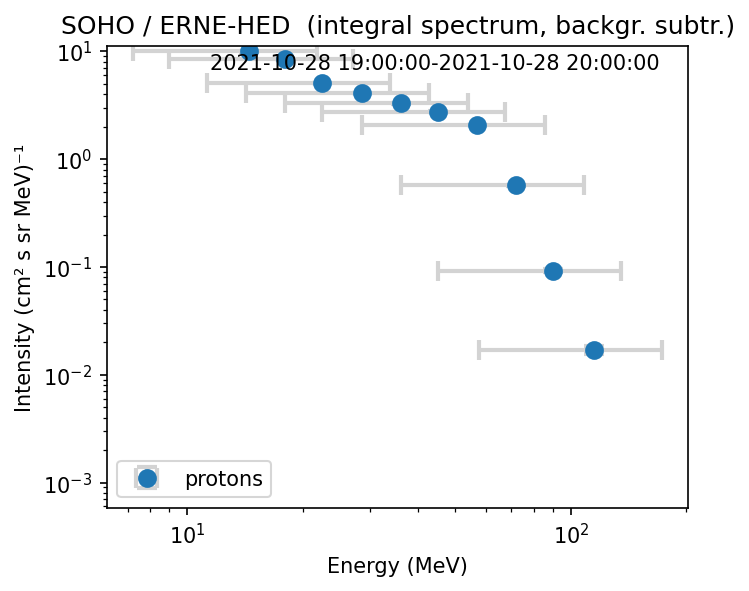

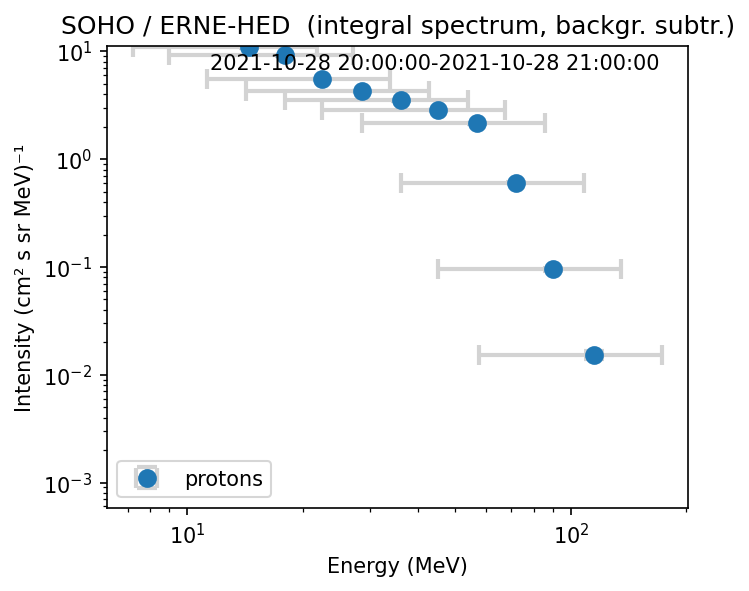

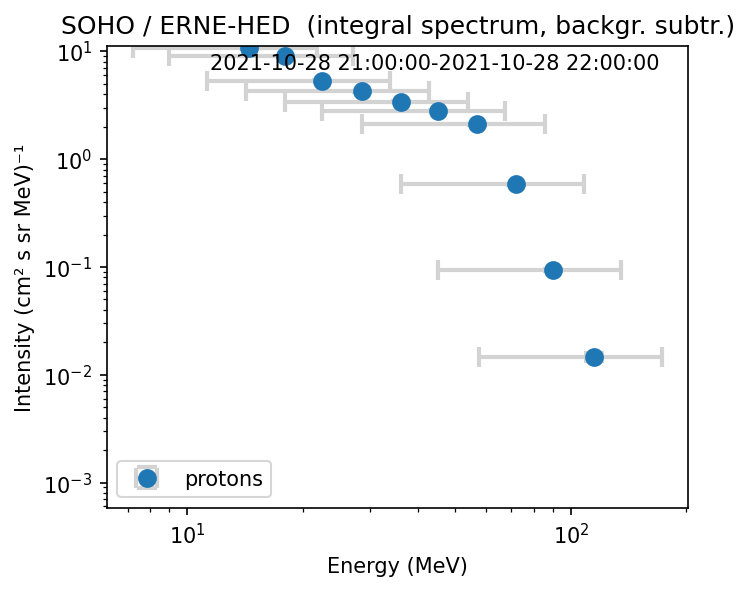

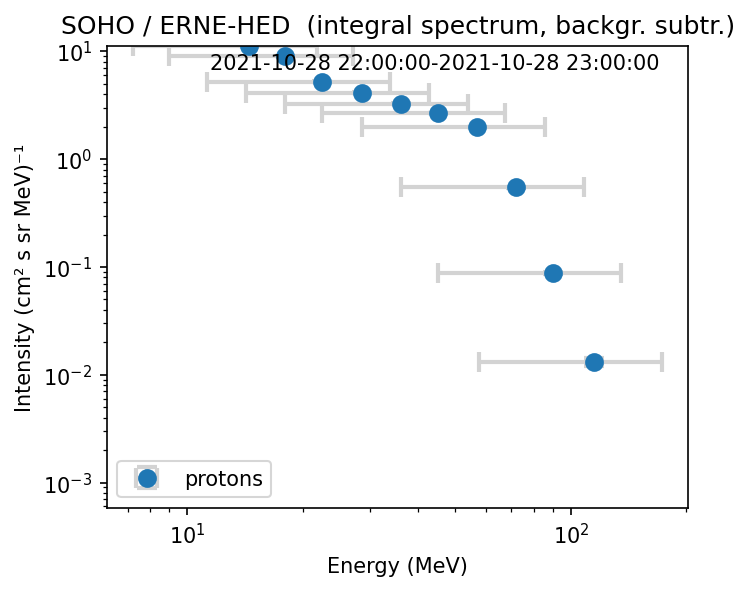

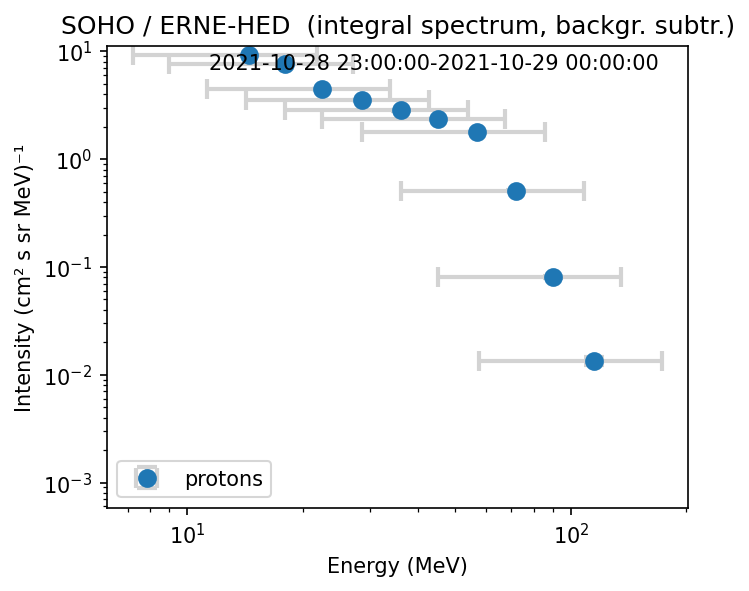

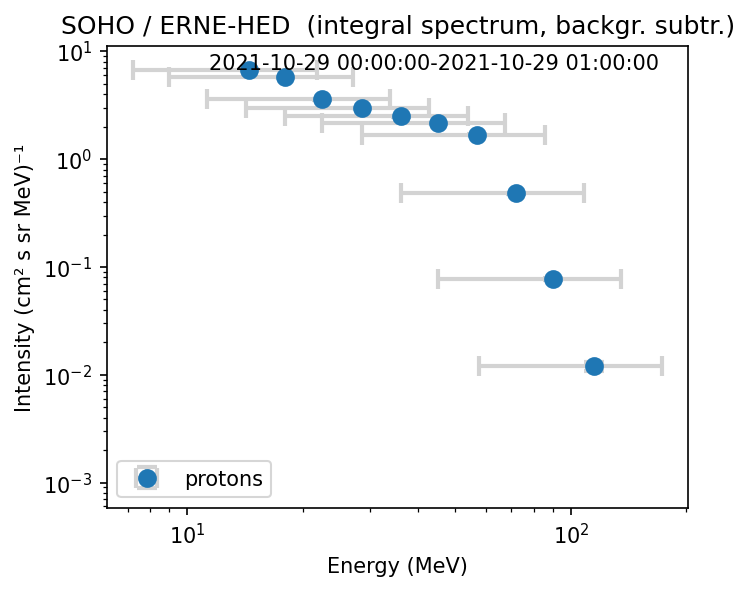

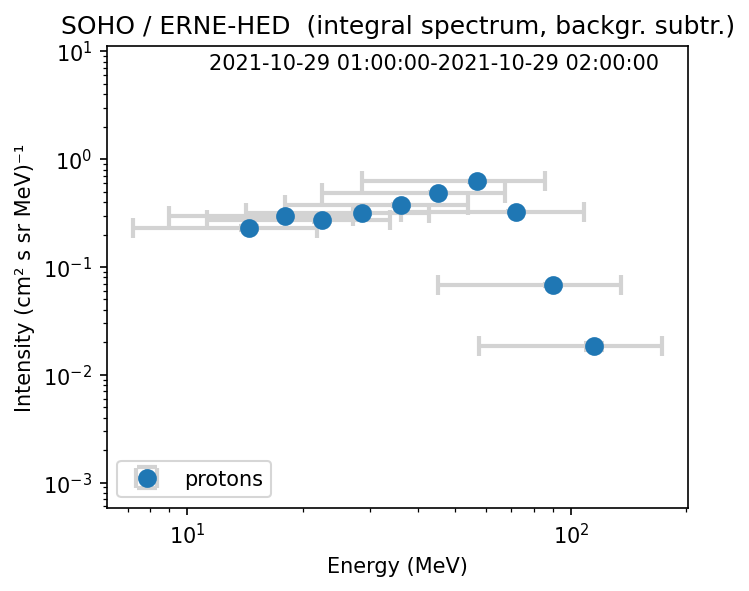

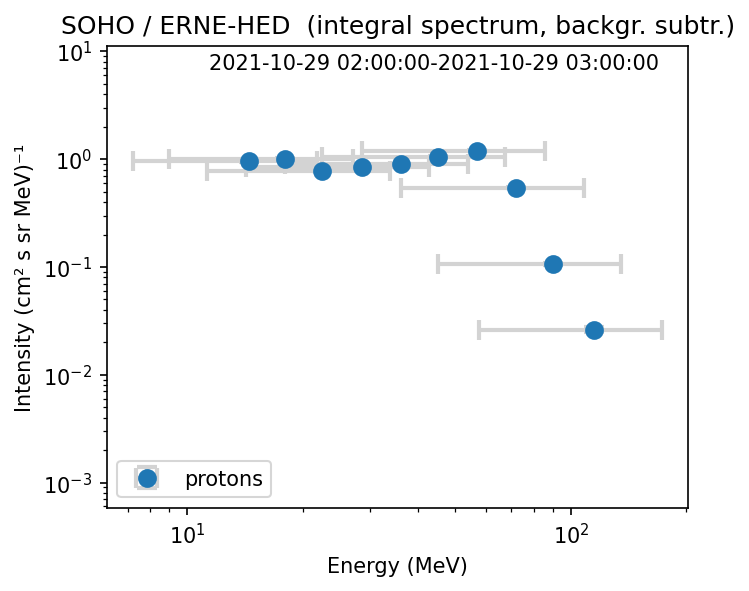

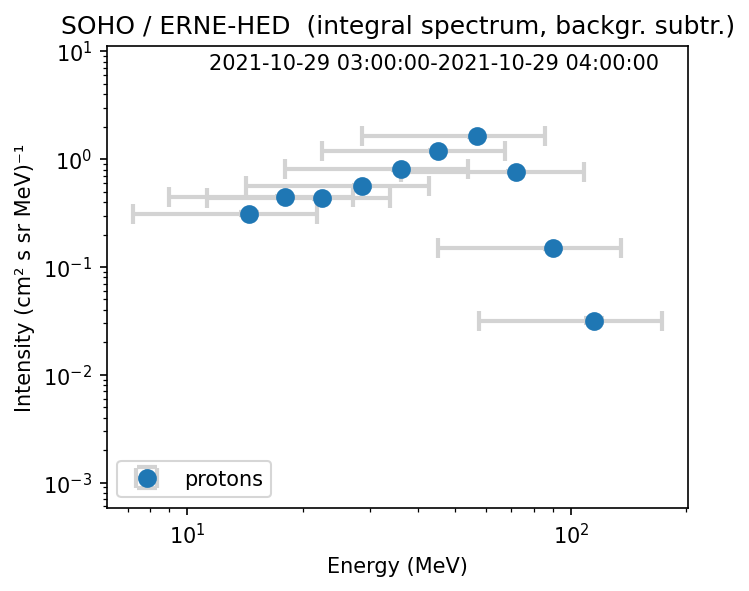

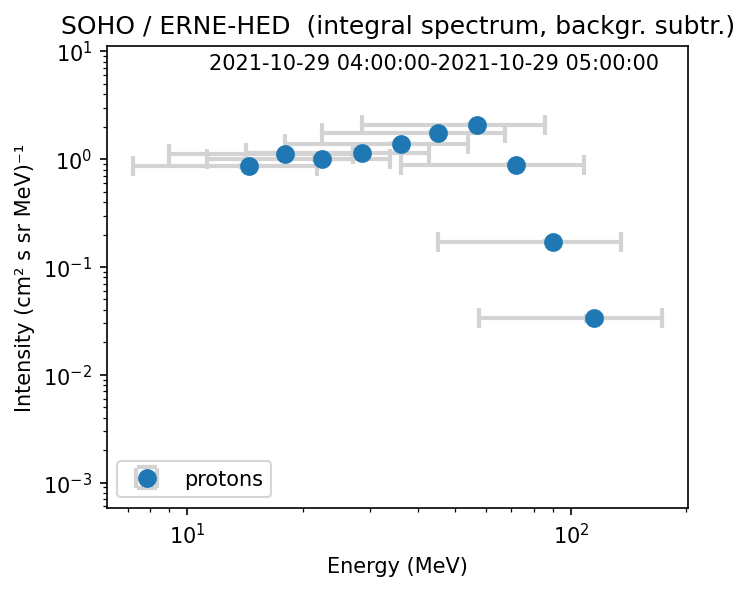

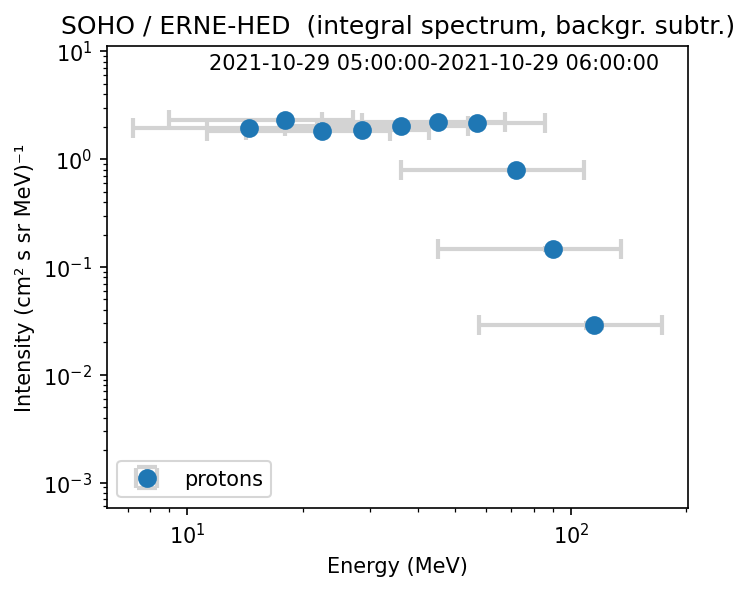

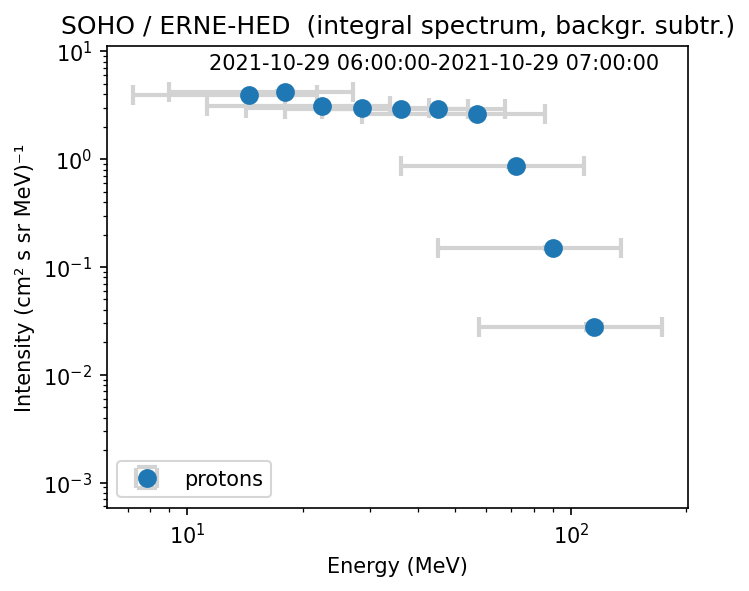

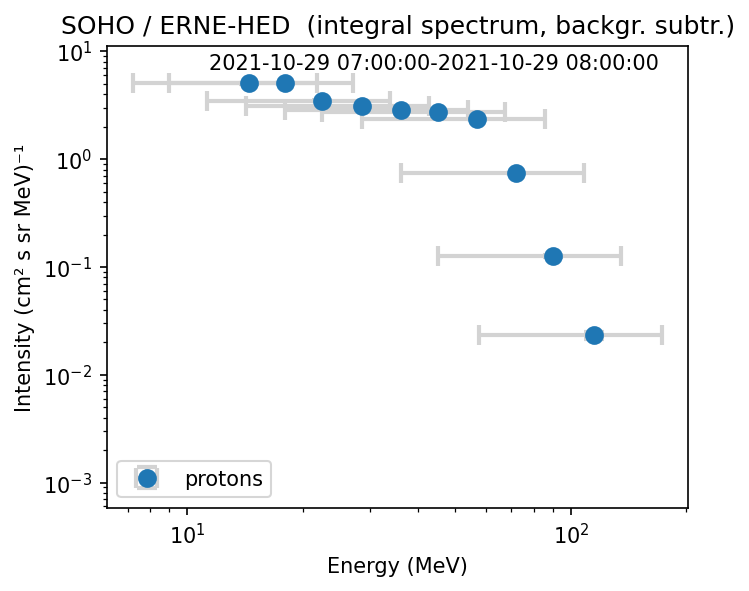

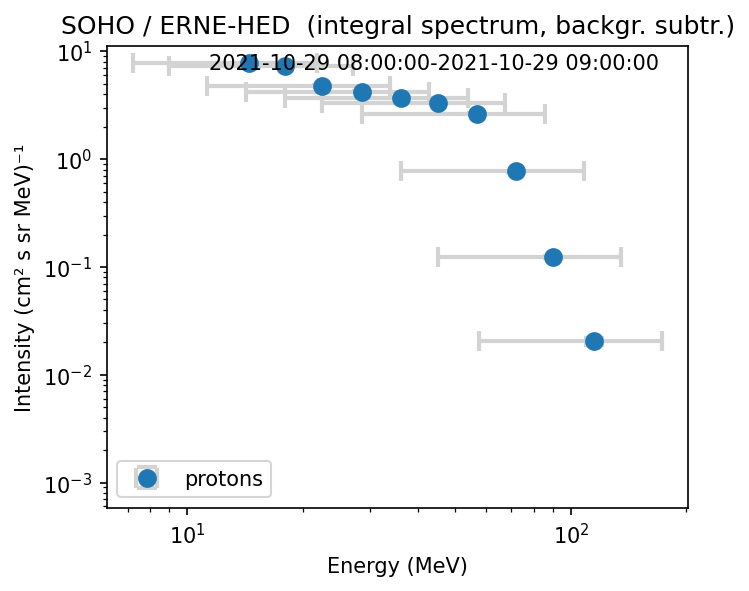

In [13]:
E.get_spec_slices(interval_start, interval_end, duration, subtract_background=subtract_background, background_start=background_start, background_end=background_end)

# Display the gif from all spectra slice plots

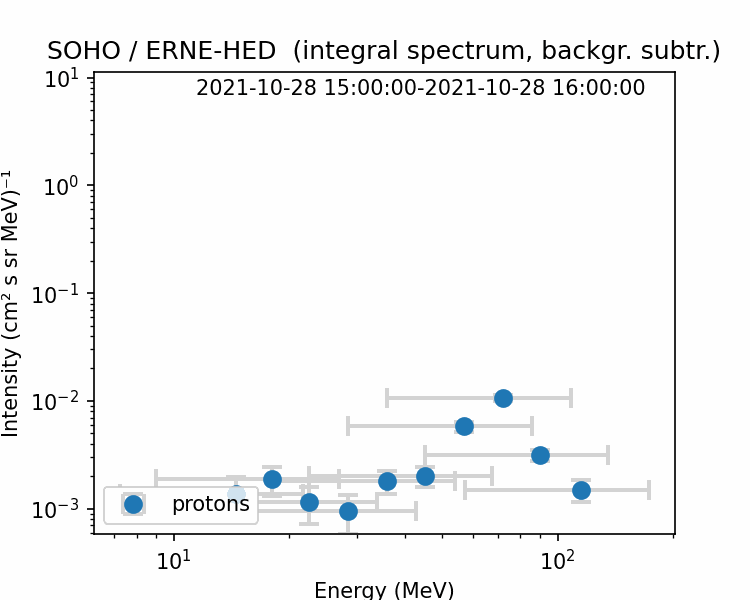

In [14]:
gif_path = E.gif_filename#'output_spectra/spectrum_slices_start_2021-10-28_15:00:00_step_60.0min_SOLO_EPT_sun_ions__animation.gif'  # replace this with the path to your GIF file
gif = Image(filename=gif_path)
display(gif)

### Saving figures

You can usually save a figure from the Notebook by right-clicking on it while holding down the ⇧ Shift key, then select "Save Image As..." (or similar).